# Gradient Descent Implementation for Simple Linear Regression

# Suzen Firasta
# 210968058

In [27]:
# Importing the dataset
import pandas as pd
df = pd.read_csv('Housing.csv')
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [28]:
# Converting Yes to 1 and No to 0
df['mainroad'] = df['mainroad'].map({'yes':1,'no':0})
df['guestroom'] = df['guestroom'].map({'yes':1,'no':0})
df['basement'] = df['basement'].map({'yes':1,'no':0})
df['hotwaterheating'] = df['hotwaterheating'].map({'yes':1,'no':0})
df['airconditioning'] = df['airconditioning'].map({'yes':1,'no':0})
df['prefarea'] = df['prefarea'].map({'yes':1,'no':0})

In [29]:
status = pd.get_dummies(df['furnishingstatus'],drop_first = True)
df = pd.concat([df,status],axis=1)
df.drop(['furnishingstatus'],axis = 1,inplace=True)

In [30]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0,0


In [31]:
# Normalising the data

In [32]:
df = (df - df.mean())/df.std()
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
0,4.562174,1.045766,1.402131,1.420507,1.376952,0.405251,-0.464888,-0.733865,-0.219063,1.471267,1.516299,1.803284,-0.844113,-0.69579
1,4.000809,1.755397,1.402131,5.400847,2.529700,0.405251,-0.464888,-0.733865,-0.219063,1.471267,2.676950,-0.553526,-0.844113,-0.69579
2,4.000809,2.216196,0.047235,1.420507,0.224204,0.405251,-0.464888,1.360148,-0.219063,-0.678439,1.516299,1.803284,1.182502,-0.69579
3,3.982096,1.082630,1.402131,1.420507,0.224204,0.405251,-0.464888,1.360148,-0.219063,1.471267,2.676950,1.803284,-0.844113,-0.69579
4,3.551716,1.045766,1.402131,-0.569663,0.224204,0.405251,2.147110,1.360148,-0.219063,1.471267,1.516299,-0.553526,-0.844113,-0.69579


In [33]:
import numpy as np
x = np.array(df['area'])
y = np.array(df['price'])

# Gradient Descent

In [34]:
def gradient(x,y,m_current=0,c_current=0,iters=1000,learning_rate=0.01):
    N = float(len(y))
    gd_df = pd.DataFrame(columns = ['m_current','c_current','cost'])
    for i in range(iters):
        y_current = (m_current * x ) + c_current
        cost = sum([data**2 for data in (y-y_current)])/N
        m_gradient = -(2/N) * sum(x * (y - y_current))
        c_gradient = -(2/N) * sum(y - y_current)
        m_current = m_current - (learning_rate * m_gradient)
        c_current = c_current - (learning_rate * c_gradient)
        gd_df.loc[i] = [m_current , c_current , cost]
    return(gd_df)

In [35]:
gradients = gradient(x,y)
gradients

,m_current,c_current,cost
0,0.010700,5.117211e-18,0.998165
1,0.021187,2.230224e-17,0.986830
2,0.031464,3.243888e-17,0.975943
3,0.041536,3.045067e-17,0.965486
4,0.051407,2.675943e-17,0.955442
...,...,...,...
995,0.535997,2.630312e-16,0.711399
996,0.535997,2.560398e-16,0.711399
997,0.535997,2.557220e-16,0.711399
998,0.535997,2.522997e-16,0.711399


<AxesSubplot:xlabel='index'>

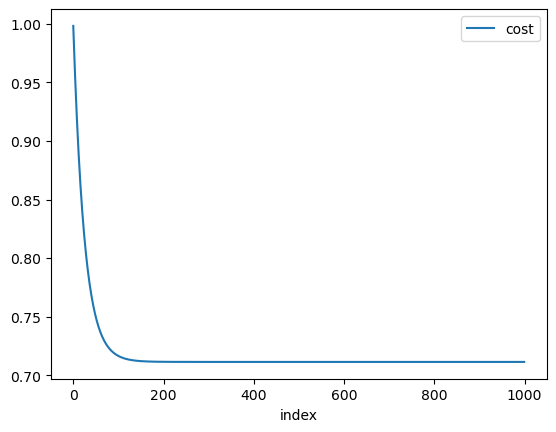

In [36]:
gradients.reset_index().plot.line(x='index' , y=['cost'])

In [37]:
x_new = x.reshape(-1,1)

In [38]:
y_new = y.reshape(-1,1)

In [39]:
from sklearn.model_selection import train_test_split

In [40]:
x_train , x_test , y_train , y_test = train_test_split(x_new,y_new,test_size=0.4,random_state=21)

In [41]:
from sklearn.linear_model import LinearRegression

In [42]:
model = LinearRegression()

In [43]:
model.fit(x_train,y_train)

LinearRegression()

In [44]:
c = model.intercept_
print("Intercept or (bo) is :- ",c)

Intercept or (bo) is :-  [0.0027317]


In [45]:
m = model.coef_
print("slope or coefficient or (b1) is :- ",m)

slope or coefficient or (b1) is :-  [[0.62926869]]


In [46]:
y_pred_train1 = model.predict(x_train)

Text(0.5, 1.0, 'Studying time vs marks plot for Linear Regression')

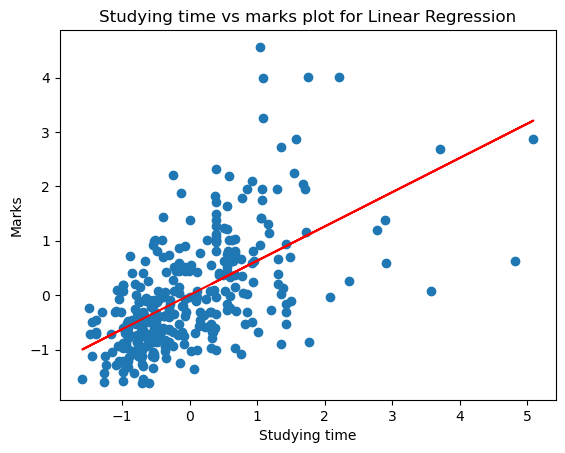

In [47]:
import matplotlib.pyplot as plt
plt.scatter(x_train,y_train)
plt.plot(x_train,y_pred_train1,color='red')
plt.xlabel('Studying time')
plt.ylabel('Marks')
plt.title('Studying time vs marks plot for Linear Regression')

In [48]:
print("Prediction for a new data point is :- ",model.predict([[58]]))

Prediction for a new data point is :-  [[36.500316]]
